# Probelm Statements
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Data Dictionary
CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable	Description
Loan_ID	Unique Loan ID
Gender	Male/ Female
Married	Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	(Target) Loan approved (Y/N)

Let's Start with our Analysis

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [86]:
#Read the data set
train=pd.read_excel(r"C:\Users\josbi\Desktop\Data Science Projects\Data.xlsx",sheet_name="train")

In [3]:
#Getting Data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            464 non-null    object 
 1   Gender             453 non-null    object 
 2   Married            462 non-null    object 
 3   Dependents         452 non-null    object 
 4   Education          464 non-null    object 
 5   Self_Employed      441 non-null    object 
 6   ApplicantIncome    464 non-null    int64  
 7   CoapplicantIncome  464 non-null    float64
 8   LoanAmount         451 non-null    float64
 9   Loan_Amount_Term   456 non-null    float64
 10  Credit_History     426 non-null    float64
 11  Property_Area      464 non-null    object 
 12  Loan_Status        464 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 47.2+ KB


In [4]:
#To View First 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
1,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
2,LP001531,Male,No,0,Graduate,No,9166,0.0,244.0,360.0,1.0,Urban,N
3,LP001532,Male,Yes,2,Not Graduate,No,2281,0.0,113.0,360.0,1.0,Rural,N
4,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y


In [5]:
#Explanatory data Analysis

In [6]:
#To find the category of Gender Column
train['Gender'].value_counts()

Male      367
Female     86
Name: Gender, dtype: int64

In [7]:
#Checking missing values
train['Gender'].isnull().sum()

11

Since data is too small, we can't remove the data, so we are applying missing value imputation techiniques to solve missing data problem


In [8]:
#Replacing Missing Values 
train['Gender']=train['Gender'].fillna('Male')

In [9]:
#Confirming no missing value
train['Gender'].isnull().sum()

0

In [10]:
#Married

In [11]:
#To find the category of Married Column
train['Married'].value_counts()

Yes    298
No     164
Name: Married, dtype: int64

In [12]:
#Checking the n.of missing value
train['Married'].isnull().sum()

2

In [13]:
#Replacing the missing value by 'yes'
train['Married']=train['Married'].fillna('Yes')

In [14]:
#Confirming no missing value
train['Married'].isnull().sum()

0

In [15]:
#Dependents

In [16]:
#To find the category of Dependents Column
train['Dependents'].value_counts()

0     256
1      81
2      75
3+     40
Name: Dependents, dtype: int64

In [17]:
#Checking the n.of missing value
train['Dependents'].isnull().sum()

12

In [18]:
#Replacing the missing value by '0'
train['Dependents']=train['Dependents'].fillna(0)

In [19]:
#Confirming no missing value
train['Dependents'].isnull().sum()

0

In [20]:
#Education

In [21]:
train['Education'].value_counts()

Graduate        359
Not Graduate    105
Name: Education, dtype: int64

In [22]:
#Confirming no missing value
train['Education'].isnull().sum()

0

In [23]:
#Self_Employed

In [24]:
train['Self_Employed'].value_counts()

No     378
Yes     63
Name: Self_Employed, dtype: int64

In [25]:
train['Self_Employed'].isnull().sum()

23

In [26]:
train['Self_Employed']=train['Self_Employed'].fillna('No')

In [27]:
train['Self_Employed'].isnull().sum()

0

In [28]:
#CoapplicantIncome

In [29]:
train['CoapplicantIncome'].isnull().sum()

0

In [30]:
#LoanAmount

In [31]:
train['LoanAmount'].isnull().sum()

13

In [32]:
train['LoanAmount'].describe()

count    451.000000
mean     147.984479
std       87.865160
min        9.000000
25%      100.500000
50%      128.000000
75%      165.000000
max      700.000000
Name: LoanAmount, dtype: float64

<Axes: >

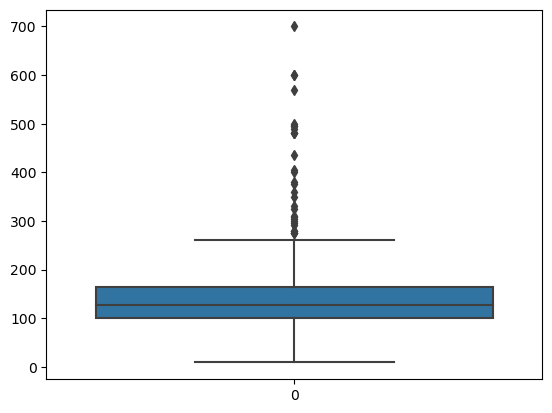

In [33]:
# Box plot
#
sns.boxplot(train['LoanAmount'])

Here is what the box plot would look like. You may note that the data is skewed. There are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.
Thus, one may want to use either median or mode.

C:\Users\josbi\AppData\Local\Temp\ipykernel_8900\3415562189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

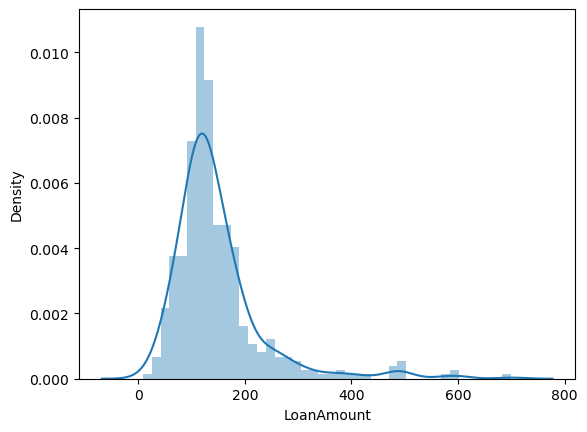

In [34]:
# Distribution plot
#
sns.distplot(train['LoanAmount'])

When the data is skewed, it is good to consider using mode values for replacing the missing values. For data points such as the salary field, you may consider using mode for replacing the values. Note that imputing missing data with mode values can be done with numerical and categorical data.

In [35]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])

In [36]:
#Loan_Amount_Term

In [37]:
train['Loan_Amount_Term'].isnull().sum()

8

In [38]:
train['Loan_Amount_Term'].describe()

count    456.000000
mean     342.105263
std       65.548220
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

<Axes: >

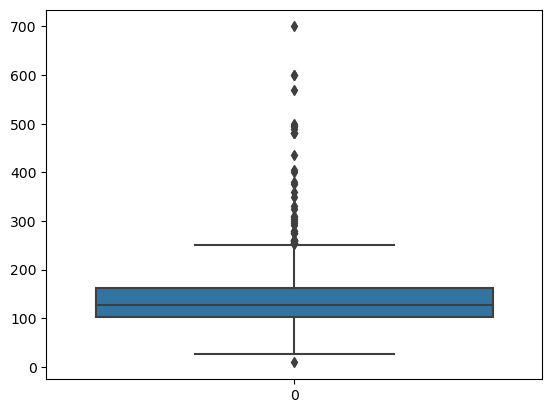

In [39]:
# Box plot
#
sns.boxplot(train['LoanAmount'])

C:\Users\josbi\AppData\Local\Temp\ipykernel_8900\33231821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

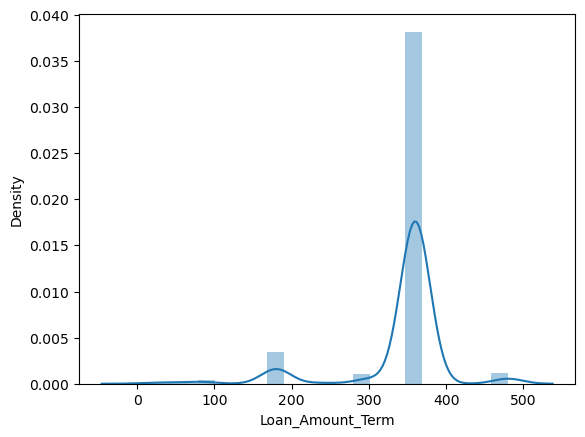

In [40]:
# Distribution plot
#
sns.distplot(train['Loan_Amount_Term'])

In [41]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

In [42]:
#Credit_History

In [43]:
train['Credit_History'].value_counts()
#here Credit history is numeric in nature but its has only two columns so we can consider it as categorical variable

1.0    357
0.0     69
Name: Credit_History, dtype: int64

In [44]:
train['Credit_History'].isnull().sum()

38

In [45]:
train['Credit_History'] = train['Credit_History'].fillna(1.0)

In [46]:
train['Credit_History'].isnull().sum()

0

In [47]:
#Property_Area

In [48]:
train['Property_Area'].value_counts()

Semiurban    173
Rural        156
Urban        135
Name: Property_Area, dtype: int64

In [49]:
train['Property_Area'].isnull().sum()

0

In [50]:
#Dependent variable is Loan_Status

In [51]:
train['Loan_Status'].value_counts()

Y    320
N    144
Name: Loan_Status, dtype: int64

Seems data is imbalanced we need to treat this issue further

In [52]:
#Now we need to convert the data into numerical data

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            464 non-null    object 
 1   Gender             464 non-null    object 
 2   Married            464 non-null    object 
 3   Dependents         464 non-null    object 
 4   Education          464 non-null    object 
 5   Self_Employed      464 non-null    object 
 6   ApplicantIncome    464 non-null    int64  
 7   CoapplicantIncome  464 non-null    float64
 8   LoanAmount         464 non-null    float64
 9   Loan_Amount_Term   464 non-null    float64
 10  Credit_History     464 non-null    float64
 11  Property_Area      464 non-null    object 
 12  Loan_Status        464 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 47.2+ KB


In [54]:
#convering the categocial variables into numerical variable

In [55]:
#set Loan_ID as index

In [56]:
train.set_index("Loan_ID", inplace = True)

In [57]:
#Spliting the data into Dependent and Independent variable

In [58]:
X=train.drop('Loan_Status', axis=1)

In [59]:
Y=train['Loan_Status']

In [60]:
#selecting on categorical variable
cat_columns = X.select_dtypes(['object']).columns

In [61]:
cat_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [62]:
#Converting it into dummy variable
trainDfDummies = pd.get_dummies(X, columns=cat_columns)

In [63]:
trainDfDummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,
LP001528,6277,0.0,118.0,360.0,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
LP001529,2577,3750.0,152.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0
LP001531,9166,0.0,244.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
LP001532,2281,0.0,113.0,360.0,1.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
LP001535,3254,0.0,50.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [64]:
trainDfDummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, LP001528 to LP002990
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          464 non-null    int64  
 1   CoapplicantIncome        464 non-null    float64
 2   LoanAmount               464 non-null    float64
 3   Loan_Amount_Term         464 non-null    float64
 4   Credit_History           464 non-null    float64
 5   Gender_Female            464 non-null    uint8  
 6   Gender_Male              464 non-null    uint8  
 7   Married_No               464 non-null    uint8  
 8   Married_Yes              464 non-null    uint8  
 9   Dependents_0             464 non-null    uint8  
 10  Dependents_1             464 non-null    uint8  
 11  Dependents_2             464 non-null    uint8  
 12  Dependents_3+            464 non-null    uint8  
 13  Education_Graduate       464 non-null    uint8  
 14  Education_Not Gradu

In [65]:
#Since Credit_History is categorical in nature, we need to convert it as categorical variable
trainDfDummies['Credit_History']=trainDfDummies['Credit_History'].astype('object')

In [66]:
cat_column1 = trainDfDummies.select_dtypes(['object']).columns
cat_column1

Index(['Credit_History'], dtype='object')

In [67]:
trainDfDummies1 = pd.get_dummies(trainDfDummies , columns=cat_column1)

C:\Users\josbi\AppData\Local\Temp\ipykernel_8900\1889445000.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  trainDfDummies1 = pd.get_dummies(trainDfDummies , columns=cat_column1)


In [68]:
trainDfDummies1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, LP001528 to LP002990
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          464 non-null    int64  
 1   CoapplicantIncome        464 non-null    float64
 2   LoanAmount               464 non-null    float64
 3   Loan_Amount_Term         464 non-null    float64
 4   Gender_Female            464 non-null    uint8  
 5   Gender_Male              464 non-null    uint8  
 6   Married_No               464 non-null    uint8  
 7   Married_Yes              464 non-null    uint8  
 8   Dependents_0             464 non-null    uint8  
 9   Dependents_1             464 non-null    uint8  
 10  Dependents_2             464 non-null    uint8  
 11  Dependents_3+            464 non-null    uint8  
 12  Education_Graduate       464 non-null    uint8  
 13  Education_Not Graduate   464 non-null    uint8  
 14  Self_Employed_No   

In [69]:
#Creating a copy
final_X=trainDfDummies1.copy()

In [70]:
final_X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001528,6277,0.0,118.0,360.0,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
LP001529,2577,3750.0,152.0,360.0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
LP001531,9166,0.0,244.0,360.0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
LP001532,2281,0.0,113.0,360.0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
LP001535,3254,0.0,50.0,360.0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [71]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 464 entries, LP001528 to LP002990
Series name: Loan_Status
Non-Null Count  Dtype 
--------------  ----- 
464 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [72]:
Y=pd.DataFrame(Y)

In [73]:
Y.head()

,Loan_Status
Loan_ID,
LP001528,N
LP001529,Y
LP001531,N
LP001532,N
LP001535,Y


In [74]:
#Converting Y and N into numeric variable
Y.Loan_Status.replace(('Y', 'N'), (1, 0), inplace=True)

In [75]:
Y.head()

,Loan_Status
Loan_ID,
LP001528,0
LP001529,1
LP001531,0
LP001532,0
LP001535,1


In [76]:
Y=Y.reset_index()

In [77]:
final_X=final_X.reset_index()

In [78]:
#Meriging the two data frames to get final data set
data_Final=pd.merge(final_X, Y, on="Loan_ID", how="inner")

In [79]:
data_Final.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0,Loan_Status
0,LP001528,6277,0.0,118.0,360.0,0,1,1,0,1,...,1,0,1,0,1,0,0,1,0,0
1,LP001529,2577,3750.0,152.0,360.0,0,1,0,1,1,...,1,0,0,1,1,0,0,0,1,1
2,LP001531,9166,0.0,244.0,360.0,0,1,1,0,1,...,1,0,1,0,0,0,1,0,1,0
3,LP001532,2281,0.0,113.0,360.0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,0
4,LP001535,3254,0.0,50.0,360.0,0,1,1,0,1,...,1,0,1,0,0,0,1,0,1,1


In [80]:
data_Final.set_index("Loan_ID", inplace = True)

In [81]:
#Split data to train and validation data set

In [82]:
#spliting the data into independent and dependent variable
indep= data_Final.drop('Loan_Status', axis=1)
dep=data_Final['Loan_Status']

In [83]:
#Spliting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [84]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


Accuracy is the proportion of correct predictions over total predictions. Our model gives 84 % correct predictions over total predictions

In [85]:
# Finding Classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64        38
           1       0.80      0.97      0.88        78

    accuracy                           0.82       116
   macro avg       0.85      0.74      0.76       116
weighted avg       0.83      0.82      0.80       116



The model precision score measures the proportion of positively predicted labels that are actually correct. 
Model recall score represents the model’s ability to correctly predict the positives out of actual positives.
F1-score is harmonic mean of precision and recall score and is used as a metrics in the scenarios where choosing either of precision or recall score can result in compromise in terms of model giving high false positives and false negatives respectively.